### TASK 4

In [1]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster, Search

In [2]:
# Load the dataset with only necessary columns
df = pd.read_csv('dataset.csv', usecols=['Restaurant Name', 'Latitude', 'Longitude'])

In [3]:
invalid_df = df[(df['Latitude'] == 0) | (df['Longitude'] == 0)]

In [4]:
invalid_df

,Restaurant Name,Longitude,Latitude
625,Rangrezz Restaurant,0.000000,0.0
629,MoMo Cafe,0.000000,0.0
632,G Thal,0.000000,0.0
638,Bon Barbecue,0.000000,0.0
639,Chapter 1 Cafe,0.000000,0.0
...,...,...,...
9268,Tea Trails,0.000000,0.0
9272,Kaloreez,0.000000,0.0
9292,Fish Streat,0.000000,0.0
9312,Winona Forever,174.779441,0.0


In [5]:
# Filter out entries with invalid coordinates (0,0)
df = df[(df['Latitude'] != 0) & (df['Longitude'] != 0)]

In [6]:
# Initialize the map centered around the mean latitude and longitude
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=3)

# Add a marker cluster to the map
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the cluster
for idx, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(marker_cluster)
    
    
# Save the map
m.save('map.html')

In [7]:
#statistics work

data = pd.read_csv('dataset.csv', usecols=['City', 'Cuisines', 'Price range', 'Aggregate rating'])

data

,City,Cuisines,Price range,Aggregate rating
0,Makati City,"French, Japanese, Desserts",3,4.8
1,Makati City,Japanese,3,4.5
2,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4,4.4
3,Mandaluyong City,"Japanese, Sushi",4,4.9
4,Mandaluyong City,"Japanese, Korean",4,4.8
...,...,...,...,...
9546,��stanbul,Turkish,3,4.1
9547,��stanbul,"World Cuisine, Patisserie, Cafe",3,4.2
9548,��stanbul,"Italian, World Cuisine",4,3.7
9549,��stanbul,Restaurant Cafe,4,4.0


In [8]:
null_values = data.isnull().sum()

null_values

City                0
Cuisines            9
Price range         0
Aggregate rating    0
dtype: int64

In [9]:
# Fill null values in 'Cuisines' with a placeholder, such as 'Unknown'
data['Cuisines'] = data['Cuisines'].fillna('Unknown')

print(data.head())


               City                          Cuisines  Price range  \
0       Makati City        French, Japanese, Desserts            3   
1       Makati City                          Japanese            3   
2  Mandaluyong City  Seafood, Asian, Filipino, Indian            4   
3  Mandaluyong City                   Japanese, Sushi            4   
4  Mandaluyong City                  Japanese, Korean            4   

   Aggregate rating  
0               4.8  
1               4.5  
2               4.4  
3               4.9  
4               4.8  


In [10]:
data

,City,Cuisines,Price range,Aggregate rating
0,Makati City,"French, Japanese, Desserts",3,4.8
1,Makati City,Japanese,3,4.5
2,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4,4.4
3,Mandaluyong City,"Japanese, Sushi",4,4.9
4,Mandaluyong City,"Japanese, Korean",4,4.8
...,...,...,...,...
9546,��stanbul,Turkish,3,4.1
9547,��stanbul,"World Cuisine, Patisserie, Cafe",3,4.2
9548,��stanbul,"Italian, World Cuisine",4,3.7
9549,��stanbul,Restaurant Cafe,4,4.0


In [11]:

# Convert 'Price range' to numeric if necessary
data['Price range'] = pd.to_numeric(data['Price range'], errors='coerce')

In [12]:
# Calculate average aggregate rating by city
average_rating_by_city = data.groupby('City')['Aggregate rating'].mean().reset_index()
average_rating_by_city.columns = ['City', 'Average Rating']

In [13]:
# Split the cuisines strings into lists and explode them into separate rows
data['Cuisines'] = data['Cuisines'].str.split(',')
data_exploded = data.explode('Cuisines')

# Strip whitespace from cuisine names
data_exploded['Cuisines'] = data_exploded['Cuisines'].str.strip()

# Calculate the number of unique cuisines by city
num_cuisines_by_city = data_exploded.groupby('City')['Cuisines'].nunique().reset_index()
num_cuisines_by_city.columns = ['City', 'Number of Unique Cuisines']

In [14]:
# Calculate average price range by city
average_cost_by_city = data.groupby('City')['Price range'].mean().reset_index()
average_cost_by_city.columns = ['City', 'Average Price Range']

In [15]:
# Merge all statistics into a single DataFrame
stats_by_city = pd.merge(average_rating_by_city, num_cuisines_by_city, on='City')
stats_by_city = pd.merge(stats_by_city, average_cost_by_city, on='City')

print("Statistics by City:")
print(stats_by_city)

Statistics by City:
                City  Average Rating  Number of Unique Cuisines  \
0          Abu Dhabi        4.300000                         27   
1               Agra        3.965000                         14   
2          Ahmedabad        4.161905                         21   
3             Albany        3.555000                         21   
4          Allahabad        3.395000                         14   
..               ...             ...                        ...   
136          Weirton        3.900000                          3   
137  Wellington City        4.250000                         17   
138   Winchester Bay        3.200000                          3   
139          Yorkton        3.300000                          1   
140        ��stanbul        4.292857                         11   

     Average Price Range  
0               3.300000  
1               2.650000  
2               2.571429  
3               1.700000  
4               2.650000  
..           

In [16]:
# Sort cities by number of unique cuisines
sorted_by_cuisines = stats_by_city.sort_values(by='Number of Unique Cuisines', ascending=False)
print("Cities sorted by Number of Unique Cuisines:")
print(sorted_by_cuisines)


Cities sorted by Number of Unique Cuisines:
              City  Average Rating  Number of Unique Cuisines  \
88       New Delhi        2.438845                         81   
50         Gurgaon        2.651431                         71   
89           Noida        2.036204                         49   
103       Pretoria        4.190000                         32   
43       Faridabad        1.866932                         30   
..             ...             ...                        ...   
80          Miller        3.400000                          1   
122  Tagaytay City        4.500000                          1   
109       Randburg        4.300000                          1   
127  Trentham East        4.100000                          1   
139        Yorkton        3.300000                          1   

     Average Price Range  
88              1.621597  
50              1.855993  
89              1.601852  
103             3.700000  
43              1.454183  
..           

In [17]:
# Sort cities by average price range
sorted_by_price = stats_by_city.sort_values(by='Average Price Range', ascending=False)
print("Cities sorted by Average Price Range:")
print(sorted_by_price)


Cities sorted by Average Price Range:
                 City  Average Rating  Number of Unique Cuisines  \
93          Panchkula             4.2                          3   
133  Vineland Station             4.3                          3   
97        Paynesville             2.6                          1   
60       Johannesburg             4.2                         16   
56         Inner City             4.9                          3   
..                ...             ...                        ...   
44            Fernley             3.7                          1   
37        Dicky Beach             3.6                          3   
80             Miller             3.4                          1   
78          Mc Millan             2.4                          2   
131          Vernonia             4.3                          2   

     Average Price Range  
93                   4.0  
133                  4.0  
97                   4.0  
60                   4.0  
56        

Correlation between Average Rating and Average Price Range: 0.39


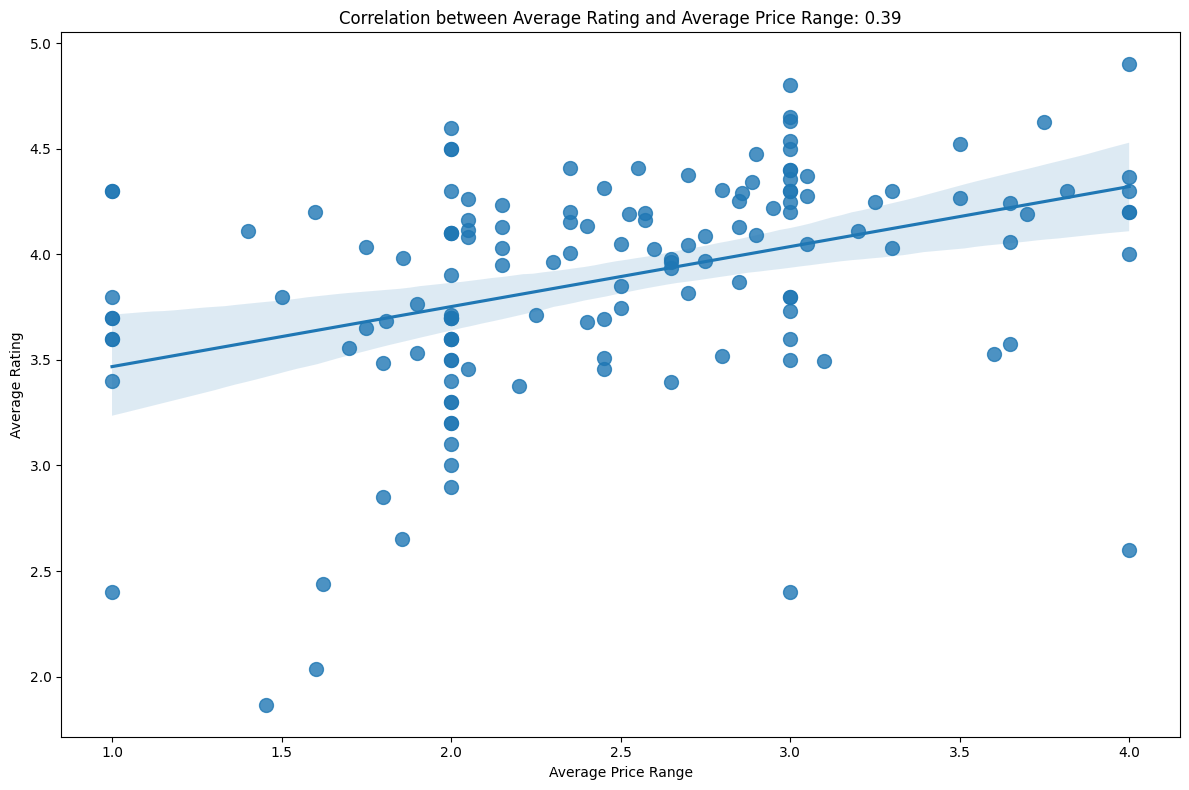

In [18]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate correlation
correlation = stats_by_city['Average Rating'].corr(stats_by_city['Average Price Range'])
print(f"Correlation between Average Rating and Average Price Range: {correlation:.2f}")

# Scatter plot with regression line
plt.figure(figsize=(12, 8))
sns.regplot(data=stats_by_city, x='Average Price Range', y='Average Rating', scatter_kws={'s':100})
plt.title(f'Correlation between Average Rating and Average Price Range: {correlation:.2f}')
plt.xlabel('Average Price Range')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()


Number of clusters: 96


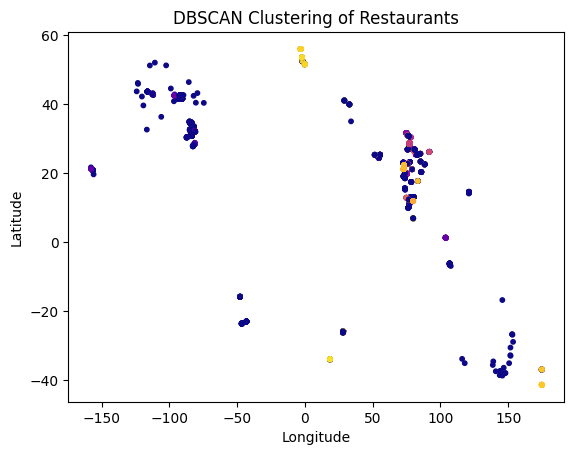

In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('dataset.csv')

# Drop rows with missing or invalid coordinates
data = data.dropna(subset=['Latitude', 'Longitude'])
data = data[(data['Latitude'] != 0) & (data['Longitude'] != 0)]

# Extract coordinates
coords = data[['Latitude', 'Longitude']].values

# DBSCAN clustering
db = DBSCAN(eps=0.01, min_samples=5).fit(coords)
data['Cluster'] = db.labels_

# Number of clusters
num_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
print(f'Number of clusters: {num_clusters}')

# Plot clusters
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], cmap='plasma', s=10)
plt.title('DBSCAN Clustering of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [20]:
import folium
from folium.plugins import HeatMap

# Initialize a map
m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)

# Prepare data for heatmap
heat_data = [[row['Latitude'], row['Longitude']] for index, row in data.iterrows()]

# Add heatmap layer
HeatMap(heat_data).add_to(m)

# Save the map
m.save('heatmap.html')


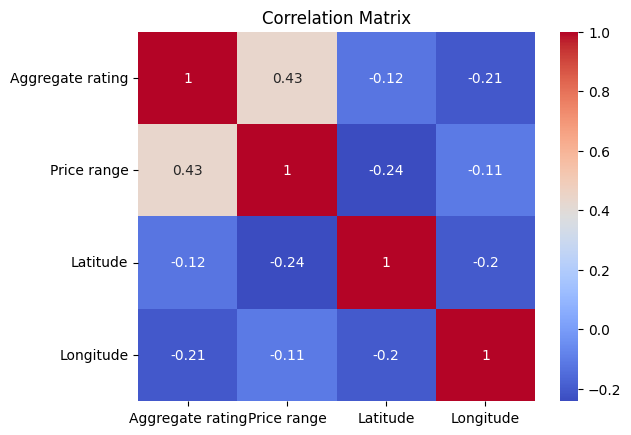

In [21]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = data[['Aggregate rating', 'Price range', 'Latitude', 'Longitude']].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
